<a href="https://colab.research.google.com/github/jdssagayo/ccs8/blob/main/Data_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Missing values by column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype:

<ipython-input-8-3d855f5a15e7>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=df, palette='viridis')


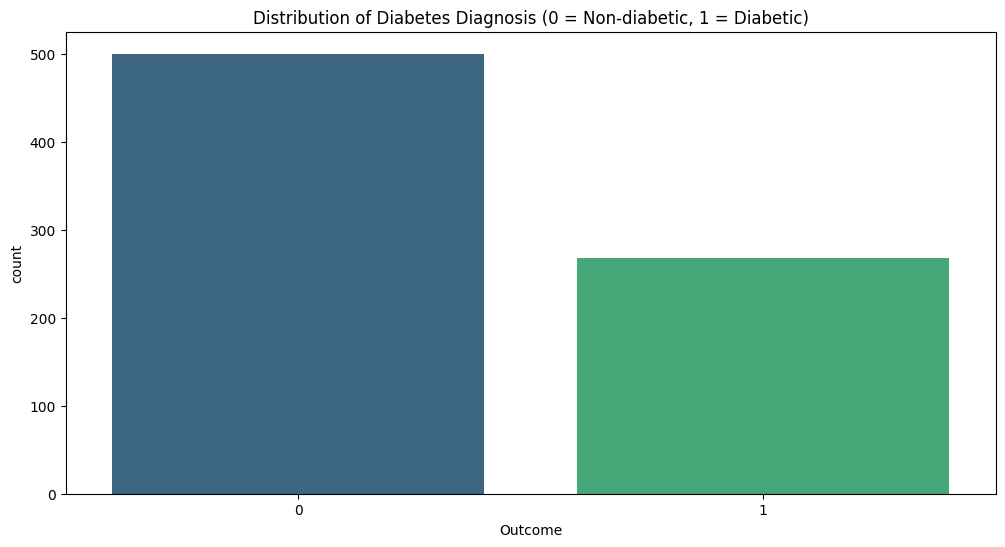

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
df = pd.read_csv('diabetes.csv')

# Check the first few rows of the dataset
print(df.head())

# Check for missing values
print("\nMissing values by column:")
print(df.isnull().sum())

# Check for duplicates
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")

# Summary statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())

# Visualize the distribution of features and the target variable (Outcome)
plt.figure(figsize=(12, 6))
sns.countplot(x='Outcome', data=df, palette='viridis')
plt.title('Distribution of Diabetes Diagnosis (0 = Non-diabetic, 1 = Diabetic)')
plt.show()

# Pairplot for the features with the target
sns.pairplot(df, hue='Outcome', diag_kind='kde', palette='coolwarm')
plt.show()

# Heatmap of correlations between features
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Handling missing values (if any)
df.fillna(df.mean(), inplace=True)  # Fill missing values with the column mean

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Split the dataset into features (X) and target variable (y)
X = df.drop(columns='Outcome')  # Features
y = df['Outcome']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features (important for algorithms like SVM and Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# Predictions and Evaluation
y_pred_log_reg = log_reg.predict(X_test_scaled)
print("\nLogistic Regression Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg):.4f}")
print(confusion_matrix(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

# Random Forest Classifier Model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_rf = rf_clf.predict(X_test)
print("\nRandom Forest Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Feature importance
feature_importances = rf_clf.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title('Feature Importance - Random Forest')
plt.show()

# Support Vector Machine (SVM) Model
svm_clf = SVC(kernel='linear', random_state=42)
svm_clf.fit(X_train_scaled, y_train)

# Predictions and Evaluation
y_pred_svm = svm_clf.predict(X_test_scaled)
print("\nSVM Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))